## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [5]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [6]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


In [7]:
df.tail()

,DATE,TAG,POSTS
2575,2024-01-01 00:00:00,php,1525
2576,2024-01-01 00:00:00,python,8250
2577,2024-01-01 00:00:00,r,1855
2578,2024-01-01 00:00:00,ruby,166
2579,2024-01-01 00:00:00,swift,924


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [8]:
df.ndim

2

In [9]:
df.shape

(2580, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [10]:
df.count()

DATE     2580
TAG      2580
POSTS    2580
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [11]:
df.groupby('TAG')[['POSTS']].sum().sort_values('POSTS')

,POSTS
TAG,
assembly,43939
delphi,51650
perl,68026
go,72169
ruby,228812
swift,332222
c,402447
r,502501
c++,803902


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [12]:
df.groupby('TAG')[['DATE']].count().sort_values(by='DATE' ,ascending=True)

,DATE
TAG,
go,171
swift,178
r,184
assembly,186
c,186
c++,186
delphi,186
java,186
javascript,186


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [13]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [14]:
df.DATE[1]

'2008-08-01 00:00:00'

In [15]:
type(df['DATE'][1])

str

In [16]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [17]:
type(df['DATE'][1])

pandas._libs.tslibs.timestamps.Timestamp

## Data Manipulation



In [18]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-01,157.0,871.0,3047.0,1491.0,105.0,424.0,3327.0,5698.0,61.0,1663.0,8616.0,2038.0,191.0,861.0
2023-10-01,175.0,975.0,3196.0,1720.0,165.0,421.0,3442.0,5495.0,53.0,1547.0,9042.0,2066.0,196.0,905.0
2023-11-01,172.0,958.0,3116.0,1470.0,103.0,411.0,3292.0,5208.0,44.0,1404.0,8491.0,1999.0,157.0,872.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [19]:
reshaped_df.ndim

2

In [20]:
reshaped_df.shape

(187, 14)

In [21]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [22]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN


In [23]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-09-01,157.0,871.0,3047.0,1491.0,105.0,424.0,3327.0,5698.0,61.0,1663.0,8616.0,2038.0,191.0,861.0
2023-10-01,175.0,975.0,3196.0,1720.0,165.0,421.0,3442.0,5495.0,53.0,1547.0,9042.0,2066.0,196.0,905.0
2023-11-01,172.0,958.0,3116.0,1470.0,103.0,411.0,3292.0,5208.0,44.0,1404.0,8491.0,1999.0,157.0,872.0
2023-12-01,182.0,878.0,2654.0,1442.0,75.0,327.0,2553.0,4796.0,53.0,1206.0,7035.0,1609.0,154.0,749.0
2024-01-01,179.0,863.0,2853.0,1715.0,90.0,364.0,3109.0,5389.0,37.0,1525.0,8250.0,1855.0,166.0,924.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [24]:
reshaped_df.count()

TAG
assembly      186
c             186
c#            187
c++           186
delphi        186
go            171
java          186
javascript    186
perl          186
php           186
python        186
r             184
ruby          186
swift         178
dtype: int64

In [25]:
reshaped_df.fillna(0, inplace=True)

In [26]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,504.0,164.0,14.0,0.0,222.0,163.0,28.0,157.0,119.0,0.0,70.0,0.0
2008-09-01,28.0,320.0,1639.0,755.0,104.0,0.0,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,807.0,112.0,0.0,1149.0,722.0,128.0,608.0,506.0,0.0,247.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,580.0,97.0,499.0,448.0,1.0,157.0,0.0


In [27]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

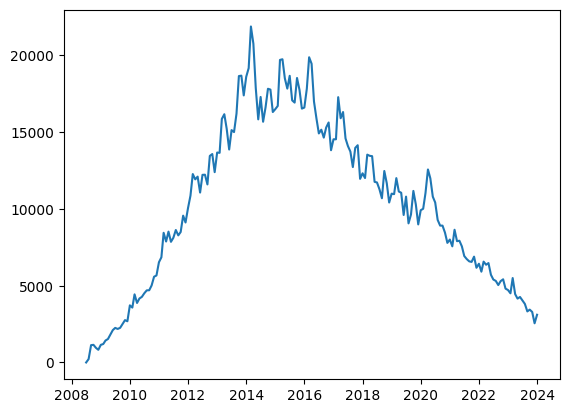

In [28]:
plt.plot(reshaped_df.index, reshaped_df['java'])

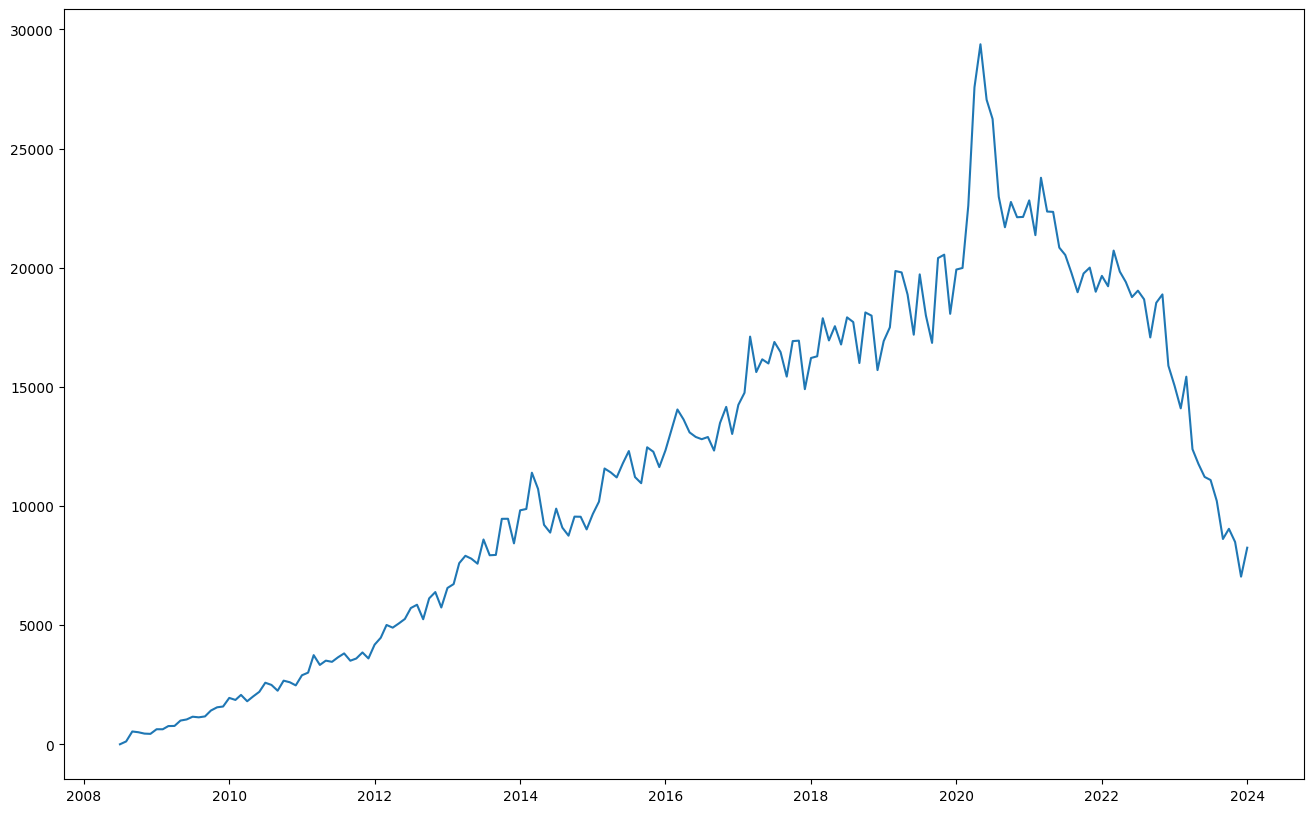

In [29]:
plt.figure(figsize=(16, 10))
plt.plot(reshaped_df.index, reshaped_df['python'])

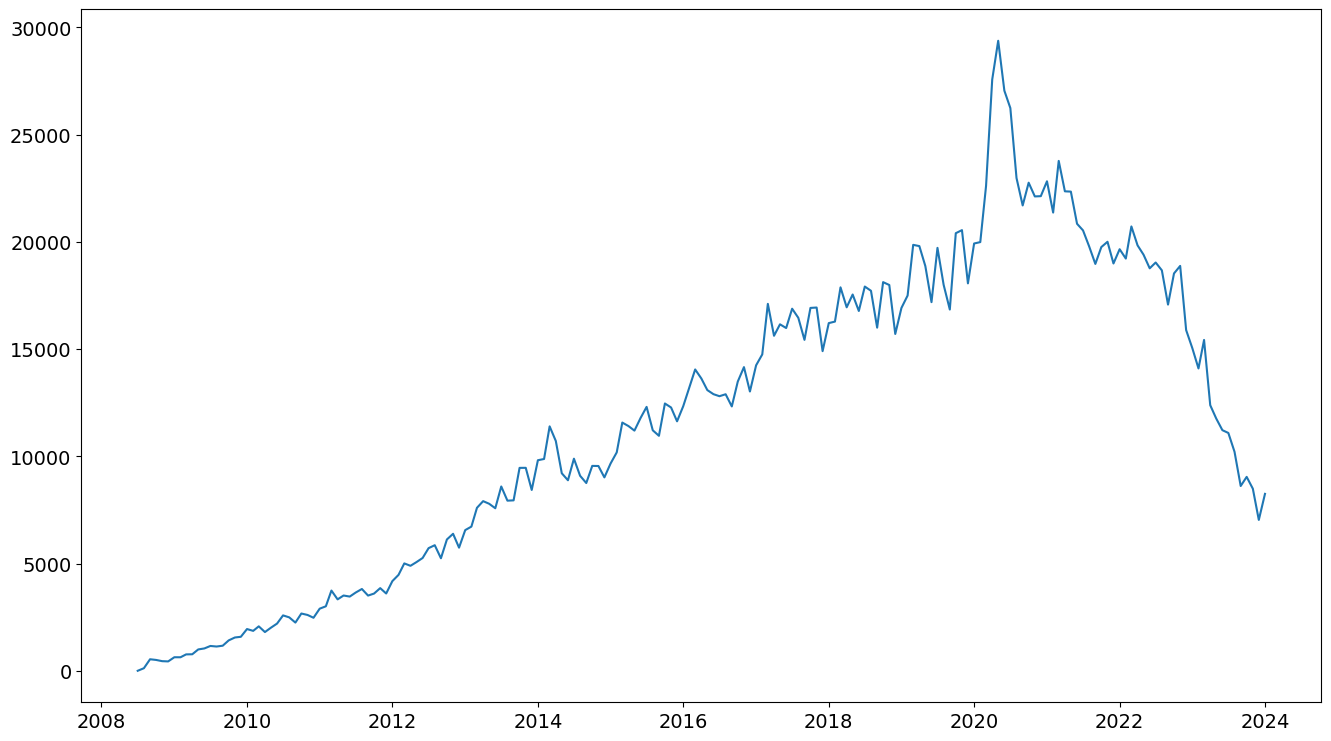

In [30]:
plt.figure(figsize=(16,9))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.python)

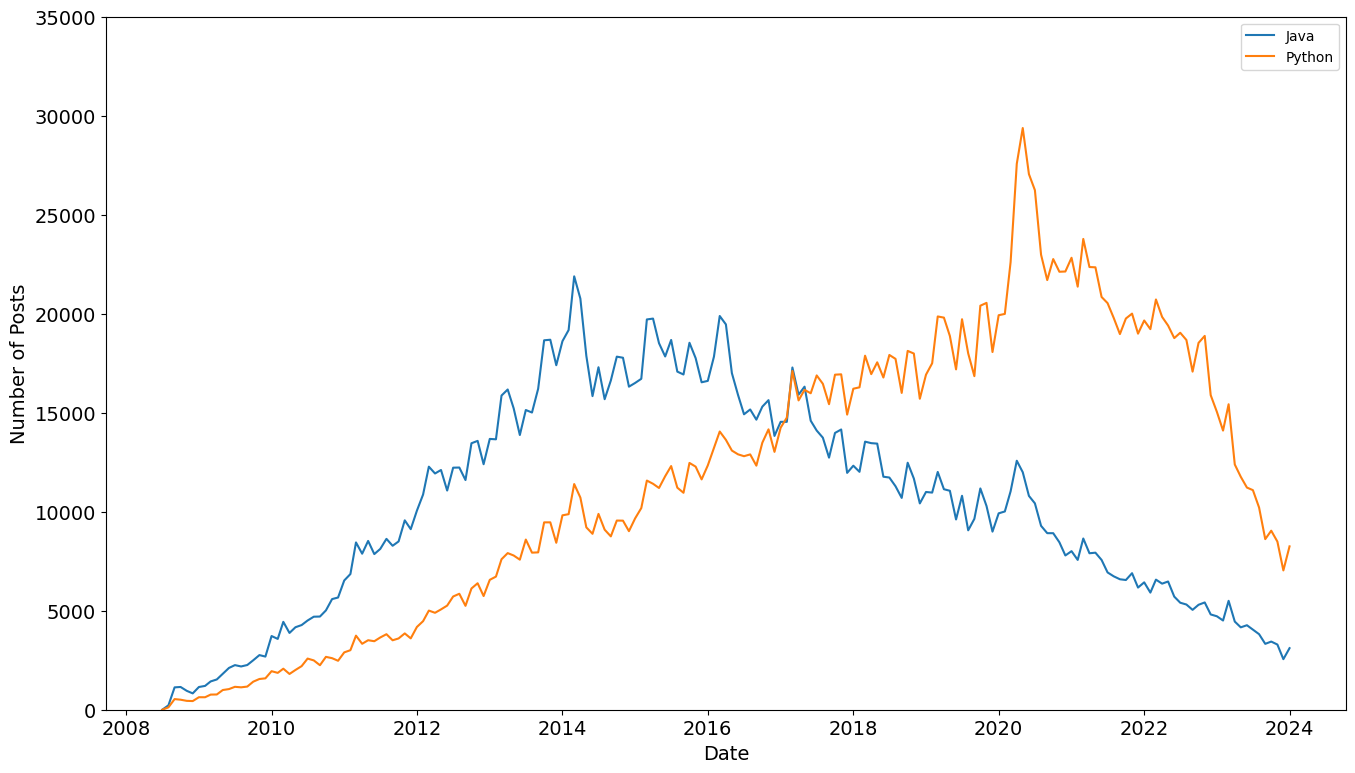

In [31]:
plt.figure(figsize=(16,9))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
lines = plt.plot(reshaped_df.index, reshaped_df[['java', 'python']])
plt.legend(lines, ['Java', 'Python'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

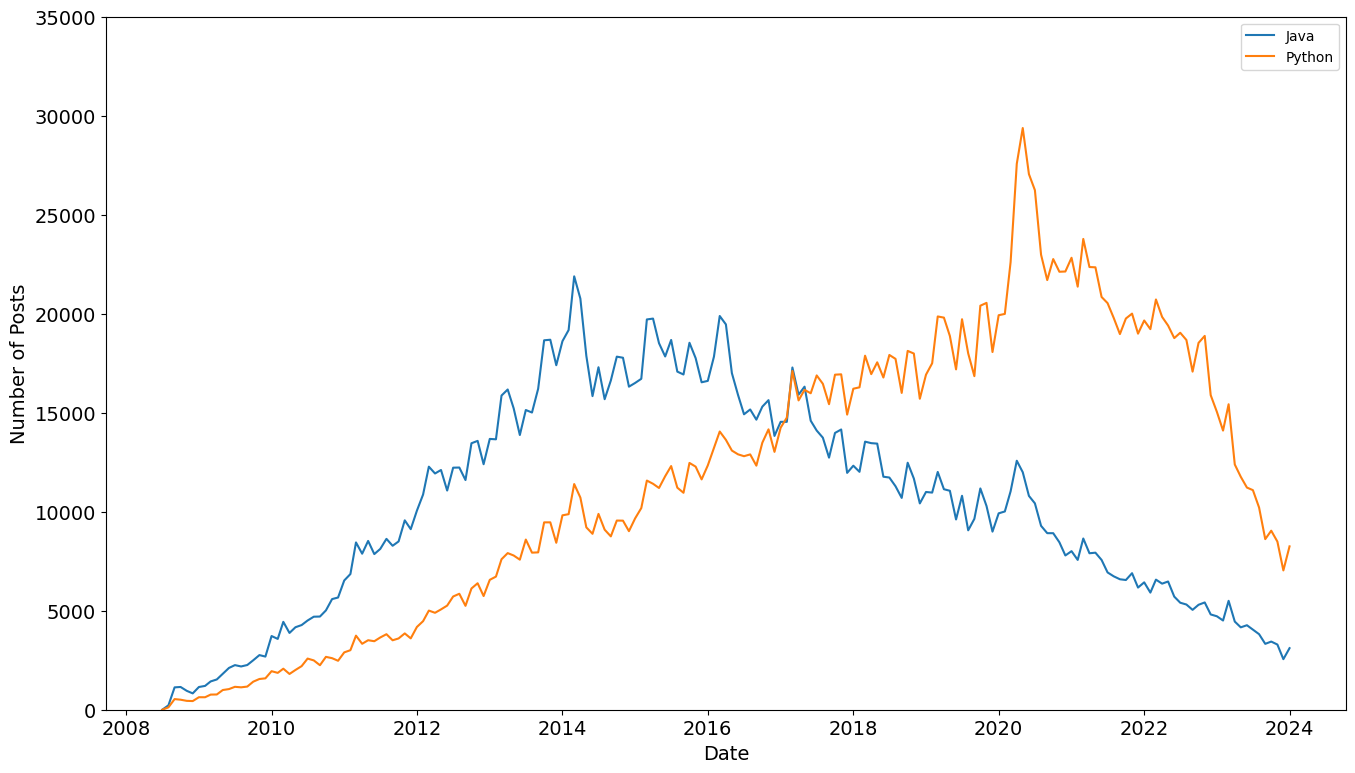

In [32]:
plt.figure(figsize=(16,9))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'], label='Java')
plt.plot(reshaped_df.index, reshaped_df['python'], label='Python')
plt.legend()

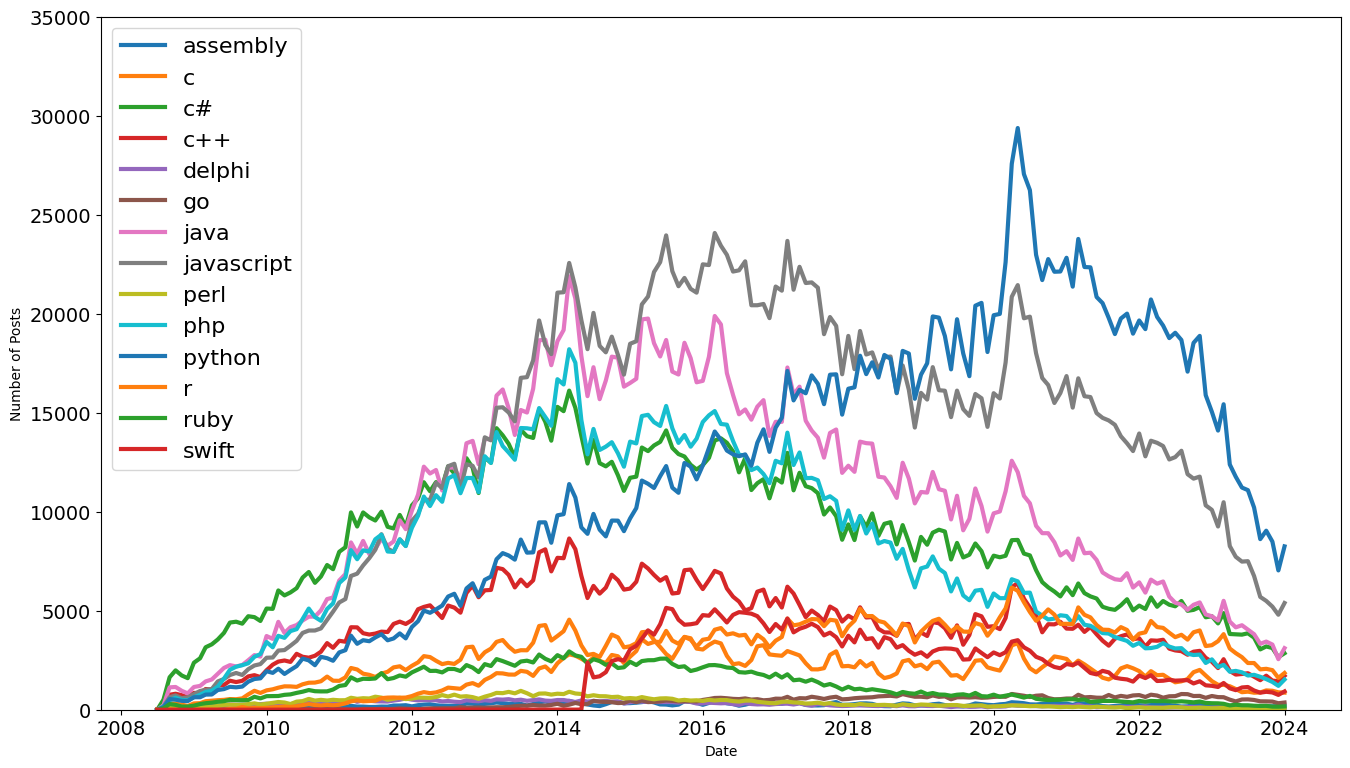

In [35]:
plt.figure(figsize=(16, 9))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

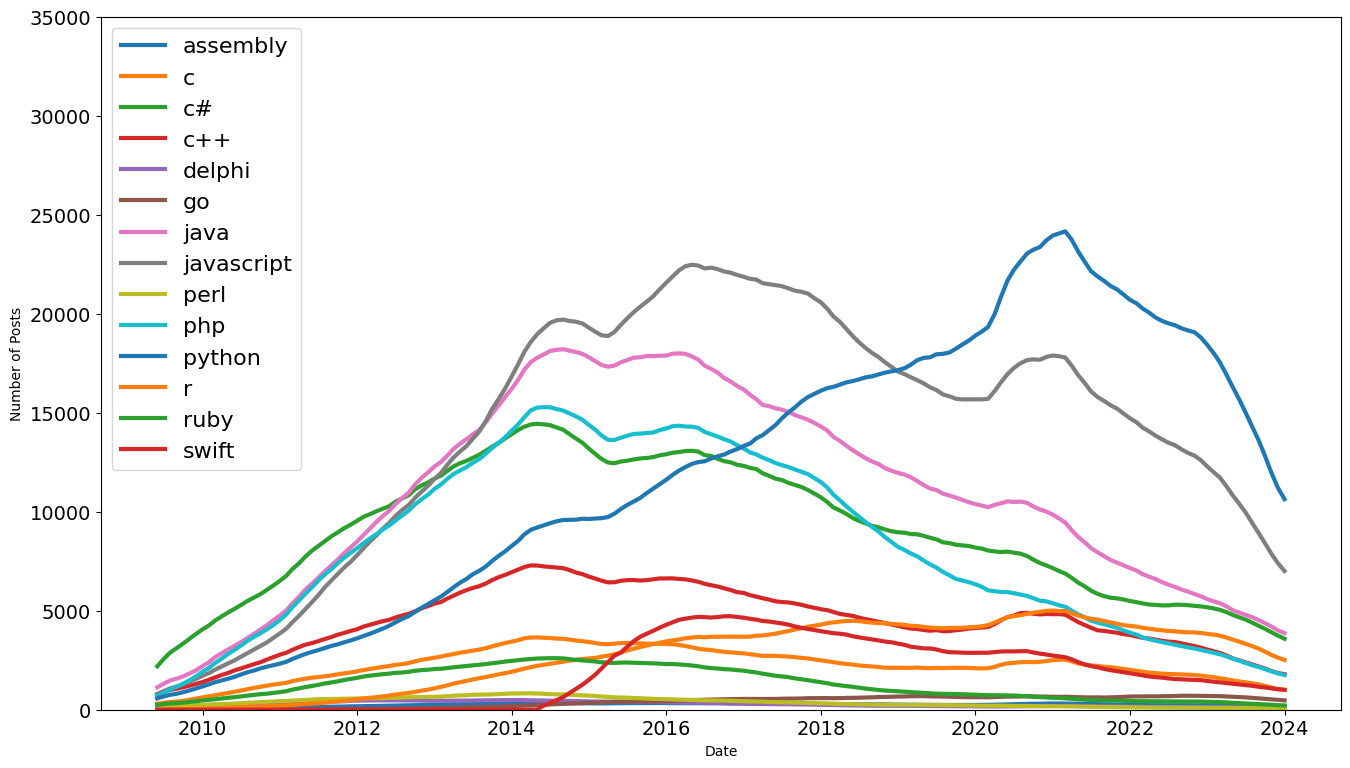

In [39]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16, 9))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.ylim(0, 35000)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

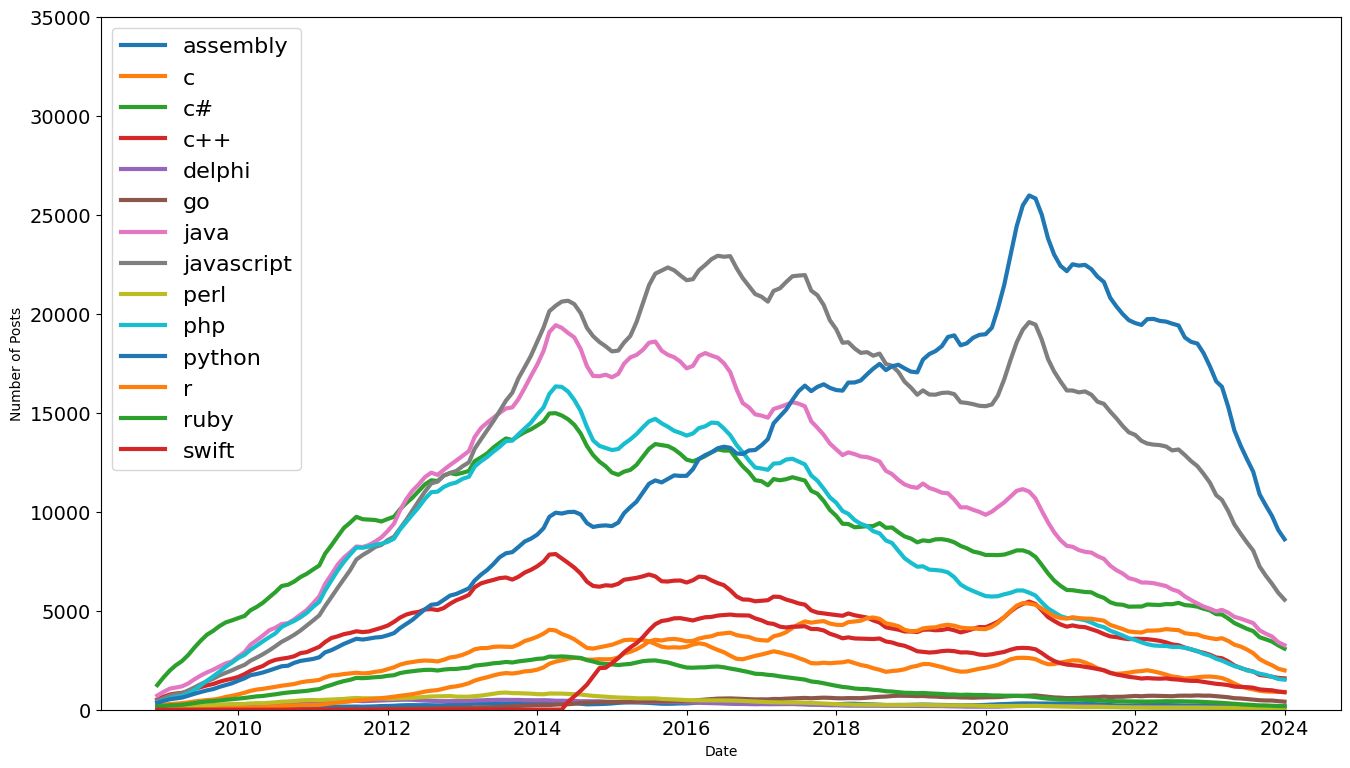

In [50]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16, 9))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.ylim(0, 35000)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)

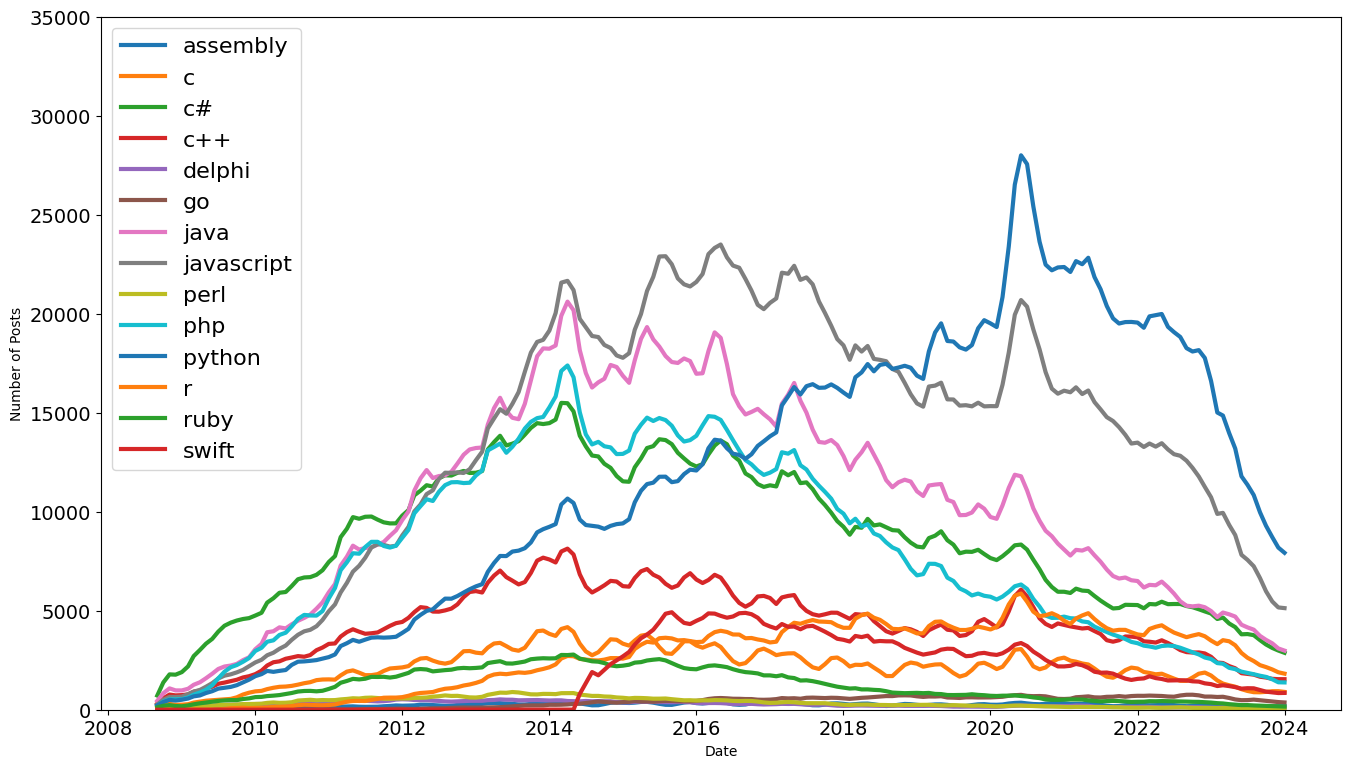

In [48]:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16, 9))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.ylim(0, 35000)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)